In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Create a contingency table
data = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'B', 'C', 'C'],
                     'Outcome': ['Success', 'Failure', 'Success', 'Failure', 'Success', 'Success', 'Failure']})

contingency_table = pd.crosstab(data['Category'], data['Outcome'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistic, p-value, and expected frequencies
print(f"Chi-square test statistic = {chi2_stat:.2f}")
print(f"P-value = {p_value:.4f}")
print("Expected frequencies:")
print(expected)

Chi-square test statistic = 0.19
P-value = 0.9074
Expected frequencies:
[[0.85714286 1.14285714]
 [1.28571429 1.71428571]
 [0.85714286 1.14285714]]


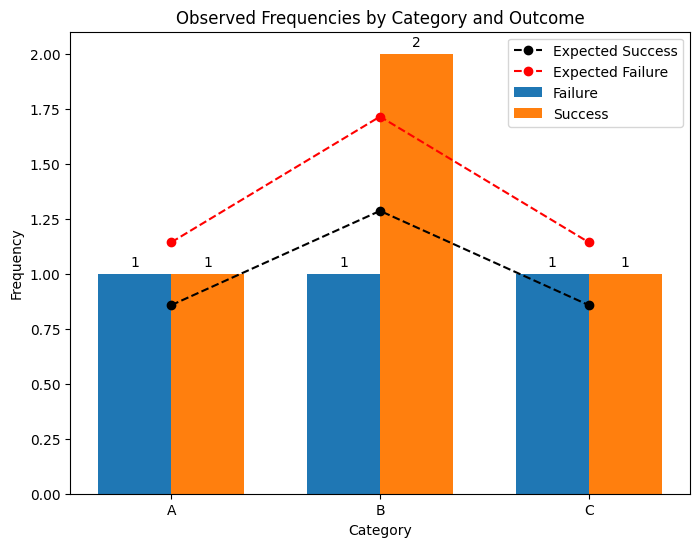

In [3]:
# Plot the observed and expected frequencies
categories = contingency_table.index
outcomes = contingency_table.columns

observed_freq = np.array(contingency_table)
expected_freq = np.array(expected)

width = 0.35
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, observed_freq[:, 0], width, label=outcomes[0])
rects2 = ax.bar(x + width/2, observed_freq[:, 1], width, label=outcomes[1])

ax.set_xlabel('Category')
ax.set_ylabel('Frequency')
ax.set_title('Observed Frequencies by Category and Outcome')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add text labels for the observed frequencies
for i, rect in enumerate(rects1):
    height = rect.get_height()
    ax.annotate(f'{observed_freq[i, 0]}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for i, rect in enumerate(rects2):
    height = rect.get_height()
    ax.annotate(f'{observed_freq[i, 1]}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Add a line plot for the expected frequencies
line = ax.plot(x, expected_freq[:, 0], marker='o', linestyle='--', color='black', label='Expected Success')
line = ax.plot(x, expected_freq[:, 1], marker='o', linestyle='--', color='red', label='Expected Failure')
ax.legend()

plt.show()